In [1]:
import pandas as pd
import numpy as np

#Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus as pydotplus
from IPython.display import Image
import mlxtend as mlxtend

#Library for building machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [2]:
# Reading the data and creating the dataframe
df = pd.read_csv("telco.csv", sep=',', header=0)

In [3]:
df

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,No,No,0,United States,California,...,0,1639.44,3039.53,5,Stayed,No,45,5306,NaN,NaN
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,United States,California,...,0,865.20,2807.47,3,Stayed,No,59,2140,NaN,NaN
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,United States,California,...,0,2135.52,9453.04,4,Stayed,No,71,5560,NaN,NaN
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,United States,California,...,0,0.00,319.21,4,Stayed,No,59,2793,NaN,NaN


In [4]:
# Getting info of the whole original dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [5]:
# The number of unique variables
df.nunique()

Customer ID                          7043
Gender                                  2
Age                                    62
Under 30                                2
Senior Citizen                          2
Married                                 2
Dependents                              2
Number of Dependents                   10
Country                                 1
State                                   1
City                                 1106
Zip Code                             1626
Latitude                             1626
Longitude                            1625
Population                           1569
Quarter                                 1
Referred a Friend                       2
Number of Referrals                    12
Tenure in Months                       72
Offer                                   5
Phone Service                           2
Avg Monthly Long Distance Charges    3584
Multiple Lines                          2
Internet Service                  

In [6]:
# Dropping the variables we don't need
df=df.drop(["Country", "State", "Quarter", "Customer ID", "Offer", "Internet Service", "Customer Status", "Churn Score", "CLTV",
           "Latitude", "Satisfaction Score", "Longitude", "Under 30", "Senior Citizen", "Dependents", "Referred a Friend", "Total Long Distance Charges", "Total Revenue", "Total Charges",
            "Churn Category", "Churn Reason", "City", "Zip Code"], axis=1)

In [7]:
# New info after dropping the variables
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   Population                         7043 non-null   int64  
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Type                      5517 non-null   object 
 11  Avg Monthly GB Download            7043 non-null   int64

In [8]:
# Changing yes/no to 1/0
df["Gender"] = df["Gender"].replace({"Male" : 1, "Female" : 0})
df["Married"] = df["Married"].replace({"Yes" : 1, "No" : 0})
df["Phone Service"] = df["Phone Service"].replace({"Yes" : 1, "No" : 0})
df["Multiple Lines"] = df["Multiple Lines"].replace({"Yes" : 1, "No" : 0})
df["Online Security"] = df["Online Security"].replace({"Yes" : 1, "No" : 0})
df["Online Backup"] = df["Online Backup"].replace({"Yes" : 1, "No" : 0})
df["Device Protection Plan"] = df["Device Protection Plan"].replace({"Yes" : 1, "No" : 0})
df["Premium Tech Support"] = df["Premium Tech Support"].replace({"Yes" : 1, "No" : 0})
df["Streaming TV"] = df["Streaming TV"].replace({"Yes" : 1, "No" : 0})
df["Streaming Movies"] = df["Streaming Movies"].replace({"Yes" : 1, "No" : 0})
df["Streaming Music"] = df["Streaming Music"].replace({"Yes" : 1, "No" : 0})
df["Unlimited Data"] = df["Unlimited Data"].replace({"Yes" : 1, "No" : 0})
df["Paperless Billing"] = df["Paperless Billing"].replace({"Yes" : 1, "No" : 0})
df["Churn Label"] = df["Churn Label"].replace({"Yes" : 1, "No" : 0})

df["Contract"] = df["Contract"].replace({"Month-to-Month" : 0, "One Year" : 1, "Two Year" : 2})
df["Payment Method"] = df["Payment Method"].replace({"Bank Withdrawal" : 0, "Credit Card" : 1, "Mailed Check" : 2})
df["Internet Type"] = df["Internet Type"].replace({"None":0,"DSL":1,"Cable":2,"Fiber Optic":3})

C:\Users\danie\AppData\Local\Temp\ipykernel_5580\516422078.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"] = df["Gender"].replace({"Male" : 1, "Female" : 0})
C:\Users\danie\AppData\Local\Temp\ipykernel_5580\516422078.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Married"] = df["Married"].replace({"Yes" : 1, "No" : 0})
C:\Users\danie\AppData\Local\Temp\ipykernel_5580\516422078.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old be

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   int64  
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   int64  
 3   Number of Dependents               7043 non-null   int64  
 4   Population                         7043 non-null   int64  
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Phone Service                      7043 non-null   int64  
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   int64  
 10  Internet Type                      5517 non-null   float64
 11  Avg Monthly GB Download            7043 non-null   int64

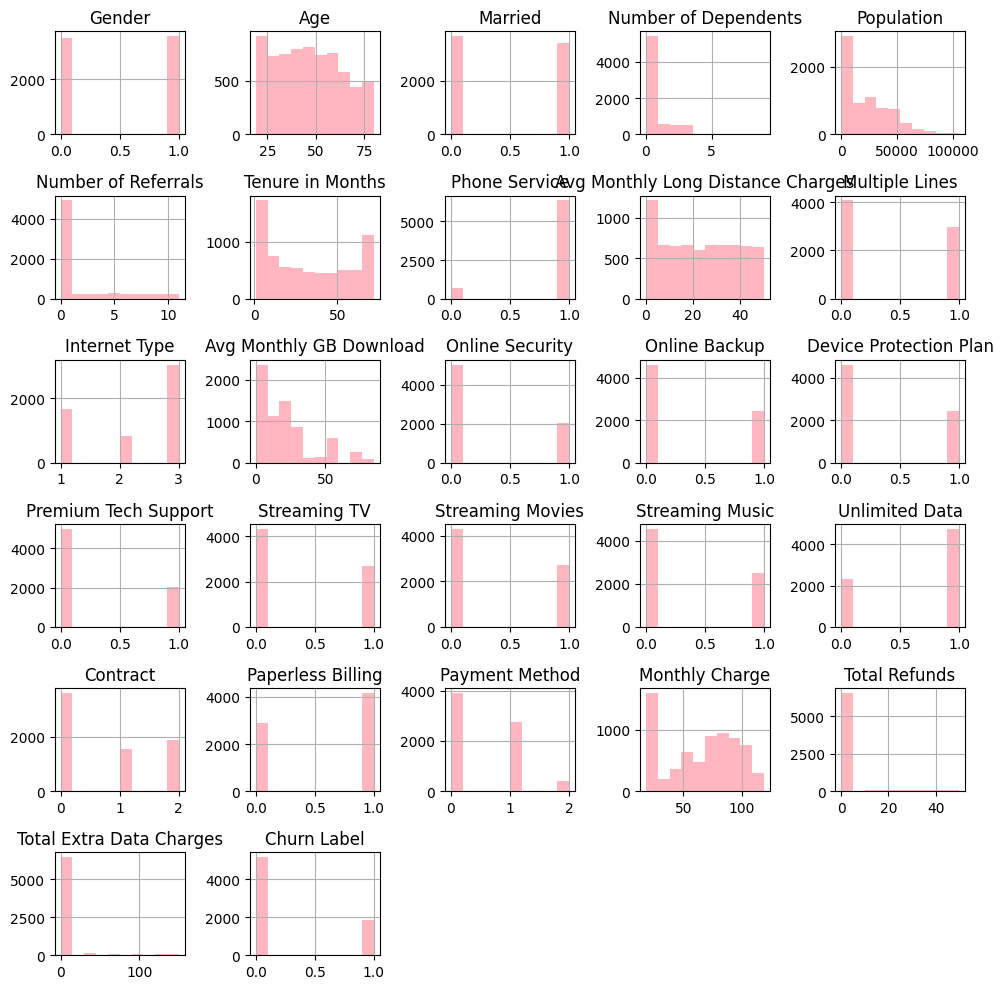

In [10]:
# Creating hstograms of the numerical variables (all)
df.hist(figsize=(10,10), color="lightpink")
plt.tight_layout()

In [11]:
# Seeing other stats of the variables
df.describe()

,Gender,Age,Married,Number of Dependents,Population,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Refunds,Total Extra Data Charges,Churn Label
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,46.509726,0.483033,0.468692,22139.603294,1.951867,32.386767,0.903166,22.958954,0.421837,...,0.387903,0.353259,0.673719,0.754792,0.592219,0.499645,64.761692,1.962182,6.860713,0.265370
std,0.500013,16.750352,0.499748,0.962802,21152.392837,3.001199,24.542061,0.295752,15.448113,0.493888,...,0.487307,0.478016,0.468885,0.848468,0.491457,0.599483,30.090047,7.902614,25.104978,0.441561
min,0.000000,19.000000,0.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000
25%,0.000000,32.000000,0.000000,0.000000,2344.000000,0.000000,9.000000,1.000000,9.210000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,0.000000,0.000000,0.000000
50%,1.000000,46.000000,0.000000,0.000000,17554.000000,0.000000,29.000000,1.000000,22.890000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,70.350000,0.000000,0.000000,0.000000
75%,1.000000,60.000000,1.000000,0.000000,36125.000000,3.000000,55.000000,1.000000,36.395000,1.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,89.850000,0.000000,0.000000,1.000000
max,1.000000,80.000000,1.000000,9.000000,105285.000000,11.000000,72.000000,1.000000,49.990000,1.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,118.750000,49.790000,150.000000,1.000000


In [12]:
# Counting the values of the Churn Label variable
churncounts = df["Churn Label"].value_counts()
churncounts

Churn Label
0    5174
1    1869
Name: count, dtype: int64

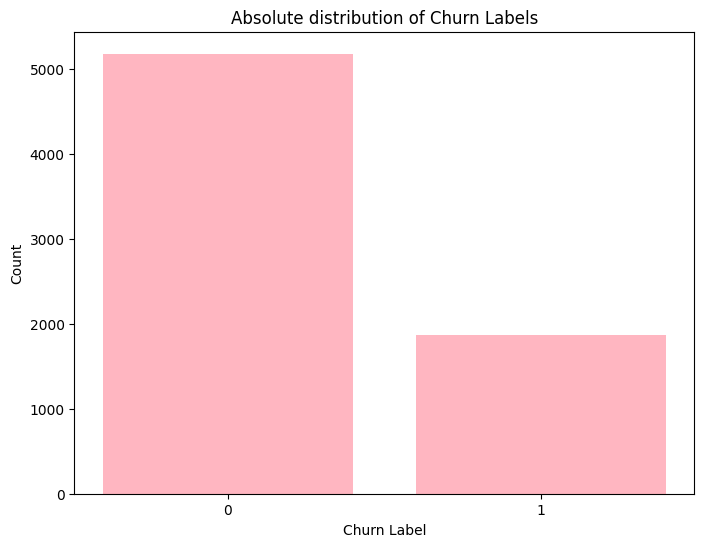

In [13]:
plt.figure(figsize=(8,6))
plt.bar(churncounts.index, churncounts.values, color="lightpink")
plt.title("Absolute distribution of Churn Labels")
plt.xlabel("Churn Label")
plt.ylabel("Count")
plt.xticks(churncounts.index)
plt.show()

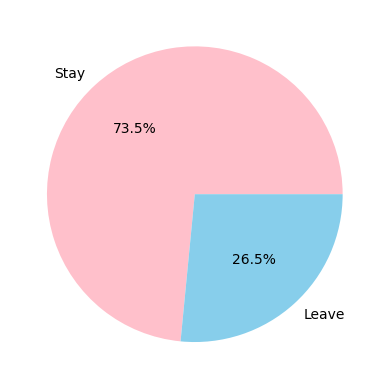

In [14]:
# Pie chart
plt.pie(churncounts, labels=["Stay", "Leave"], autopct="%1.1f%%", colors=["pink", "skyblue"]);

In [23]:
# Using one-hot encoding, making dummy variables of the two categorical variables we have
df = pd.get_dummies(df, columns=[
    "Contract",
    "Payment Method",
    "Internet Type"
])

KeyError: "None of [Index(['Contract', 'Payment Method', 'Internet Type'], dtype='object')] are in the [columns]"

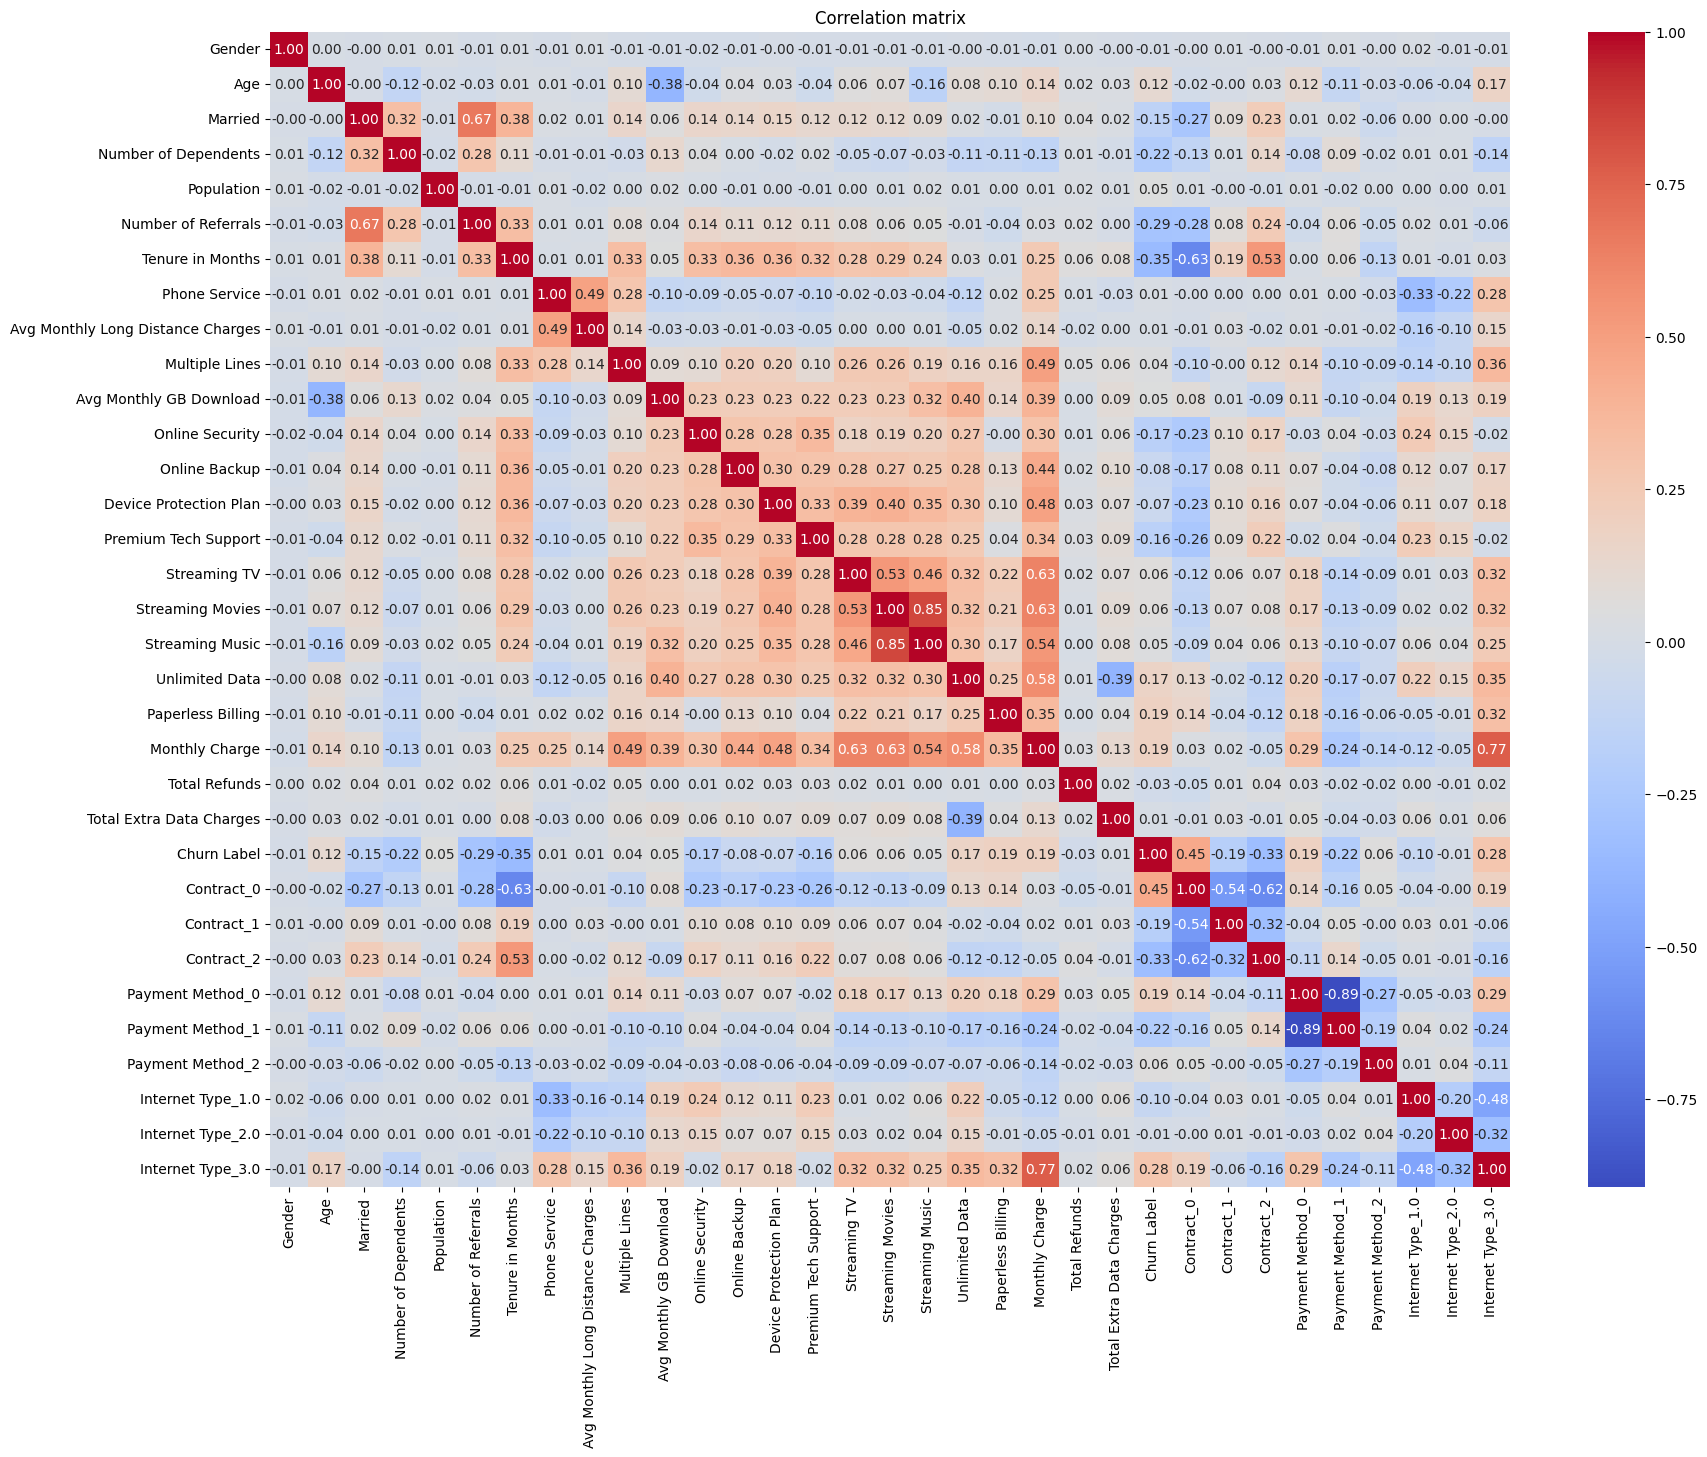

In [16]:
# Correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix")
plt.show()

In [17]:
# Creating sets X and y 
X = df.drop(["Churn Label"], axis=1)
y = df["Churn Label"]

In [18]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234, test_size=0.4)

In [19]:
# Calculating the values for y in the original, training and test set
original = y.value_counts(normalize=True)*100
train_dist = y_train.value_counts(normalize=True)*100
test_dist = y_test.value_counts(normalize=True)*100

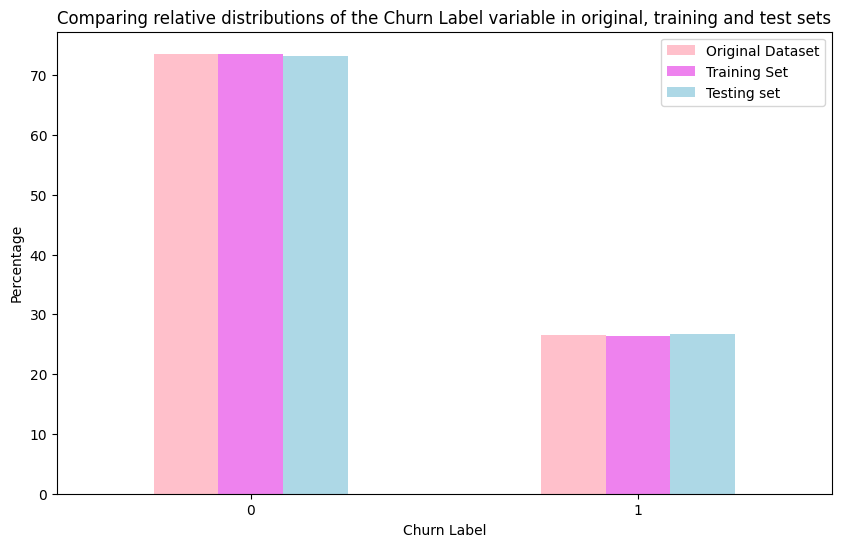

In [20]:
# Creating a dataframe of these values
dist_data = pd.DataFrame({"Original Dataset": original, "Training Set": train_dist, "Testing set": test_dist})

# Making a chart of the relative distributions of Churn Label variable in different sets
colors = ["pink", "violet", "lightblue"]
dist_data.plot(kind="bar", figsize=(10,6), color=colors)
plt.title("Comparing relative distributions of the Churn Label variable in original, training and test sets")
plt.xlabel("Churn Label")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.show()

In [24]:
# Creating logistic regression model
lr_sfs = LogisticRegression(penalty=None, max_iter=15000, multi_class="ovr", random_state=1234)

# Forward feature selection with "F1" as the scoring method
# Grouping one-hot encoded variables so they always get selected together to reduce computing time
sfs1 = SFS(
    lr_sfs,
    forward=True,
    k_features=(1, 26),
    scoring="f1",
    cv=5,
    verbose=1,
    n_jobs=-1,
    feature_groups=(['Payment Method_0', 'Payment Method_1', 'Payment Method_2'],
                    ['Contract_0', 'Contract_1', 'Contract_2'], ['Gender'], ['Age'], ['Married'], ['Number of Dependents'], ['Population'],
                    ['Number of Referrals'], ['Tenure in Months'],
                    ['Phone Service'], ['Avg Monthly Long Distance Charges'], ['Multiple Lines'],
                    ['Internet Type_1.0','Internet Type_2.0','Internet Type_3.0'], ['Avg Monthly GB Download'], ['Online Security'], ['Online Backup'], ['Device Protection Plan'],
                    ['Premium Tech Support'], ['Streaming TV'],
                    ['Streaming Movies'], ['Streaming Music'],
                    ['Unlimited Data'], ['Paperless Billing'],
                    ['Monthly Charge'], ['Total Refunds'],
                    ['Total Extra Data Charges'])
)

In [25]:
# Fitting the model using training data
sfs1.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:   13.9s finished
Features: 1/26[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.2s finished
Features: 2/26[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.3s finished
Features: 3/26[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.3s finished
Features: 4/26[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    1.3s finished
Features: 5/26[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    2.3s finished
Features: 6/26[Parallel(n_jobs=-1)]: Using

SequentialFeatureSelector(estimator=LogisticRegression(max_iter=15000,
                                                       multi_class='ovr',
                                                       penalty=None,
                                                       random_state=1234),
                          feature_groups=(['Payment Method_0',
                                           'Payment Method_1',
                                           'Payment Method_2'],
                                          ['Contract_0', 'Contract_1',
                                           'Contract_2'],
                                          ['Gender'], ['Age'], ['Married'],
                                          ['Number of Dependents'],
                                          ['Population'],
                                          ['Number of Referrals'],
                                          ['Tenure in Months'],
                                          ['Phone...
                                           'Internet Type_2.0',
                                           'Internet Type_3.0'],
                                          ['Avg Monthly GB Download'],
                                          ['Online Security'],
                                          ['Online Backup'],
                                          ['Device Protection Plan'],
                                          ['Premium Tech Support'],
                                          ['Streaming TV'],
                                          ['Streaming Movies'],
                                          ['Streaming Music'],
                                          ['Unlimited Data'],
                                          ['Paperless Billing'],
                                          ['Monthly Charge'], ['Total Refunds'],
                                          ['Total Extra Data Charges']),
                          k_features=(1, 26), n_jobs=-1, scoring='f1',
                          verbose=1)

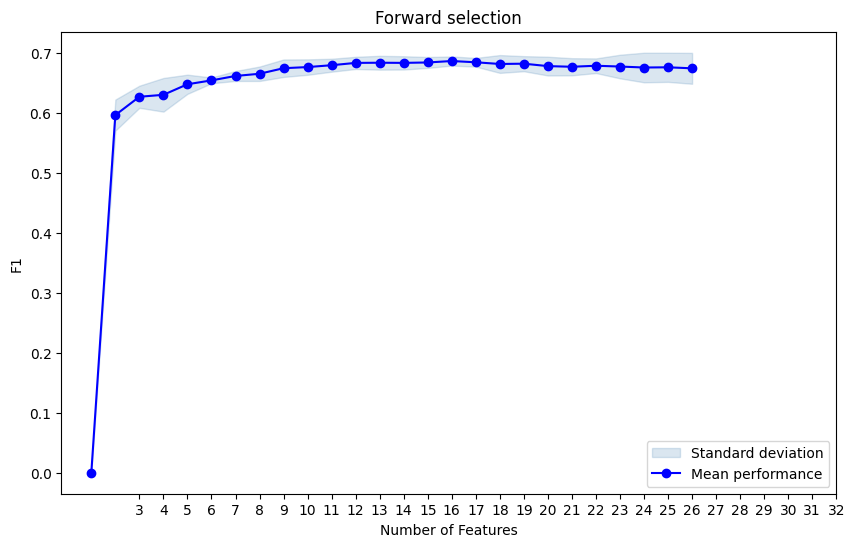

In [26]:
# Visualizing the cross validation scores for each number of features
plot_sfs(sfs1.get_metric_dict(), ylabel="F1", figsize=(10,6))
plt.title("Forward selection")
plt.legend(["Standard deviation", "Mean performance"])

In [27]:
# Names of the selected features
sfs1.k_feature_names_

('Age',
 'Married',
 'Number of Dependents',
 'Number of Referrals',
 'Tenure in Months',
 'Avg Monthly Long Distance Charges',
 'Multiple Lines',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Paperless Billing',
 'Total Refunds',
 'Total Extra Data Charges',
 'Contract_0',
 'Contract_1',
 'Contract_2',
 'Payment Method_0',
 'Payment Method_1',
 'Payment Method_2',
 'Internet Type_1.0',
 'Internet Type_2.0',
 'Internet Type_3.0')

In [28]:
# Cross-validation score for the best model with forward selection
sfs1.k_score_

0.6867048307171609

In [30]:
# Backward feature selection with "F1" as the scoring method
sfs2 = SFS(
    lr_sfs,
    k_features=(1, 26),
    forward=False,
    scoring="f1",
    cv=5,
    verbose=1,
    n_jobs=-1,
    feature_groups=(['Payment Method_0', 'Payment Method_1', 'Payment Method_2'],
                    ['Contract_0', 'Contract_1', 'Contract_2'], ['Gender'], ['Age'], ['Married'], ['Number of Dependents'], ['Population'],
                    ['Number of Referrals'], ['Tenure in Months'],
                    ['Phone Service'], ['Avg Monthly Long Distance Charges'], ['Multiple Lines'],
                    ['Internet Type_1.0','Internet Type_2.0','Internet Type_3.0'], ['Avg Monthly GB Download'], ['Online Security'], ['Online Backup'], ['Device Protection Plan'],
                    ['Premium Tech Support'], ['Streaming TV'],
                    ['Streaming Movies'], ['Streaming Music'],
                    ['Unlimited Data'], ['Paperless Billing'],
                    ['Monthly Charge'], ['Total Refunds'],
                    ['Total Extra Data Charges'])
)

# Fitting the model using training data
sfs2.fit(X_train, y_train)

C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

In

SequentialFeatureSelector(estimator=LogisticRegression(max_iter=15000,
                                                       multi_class='ovr',
                                                       penalty=None,
                                                       random_state=1234),
                          feature_groups=(['Payment Method_0',
                                           'Payment Method_1',
                                           'Payment Method_2'],
                                          ['Contract_0', 'Contract_1',
                                           'Contract_2'],
                                          ['Gender'], ['Age'], ['Married'],
                                          ['Number of Dependents'],
                                          ['Population'],
                                          ['Number of Referrals'],
                                          ['Tenure in Months'],
                                          ['Phone...
                                           'Internet Type_3.0'],
                                          ['Avg Monthly GB Download'],
                                          ['Online Security'],
                                          ['Online Backup'],
                                          ['Device Protection Plan'],
                                          ['Premium Tech Support'],
                                          ['Streaming TV'],
                                          ['Streaming Movies'],
                                          ['Streaming Music'],
                                          ['Unlimited Data'],
                                          ['Paperless Billing'],
                                          ['Monthly Charge'], ['Total Refunds'],
                                          ['Total Extra Data Charges']),
                          forward=False, k_features=(1, 26), n_jobs=-1,
                          scoring='f1', verbose=1)

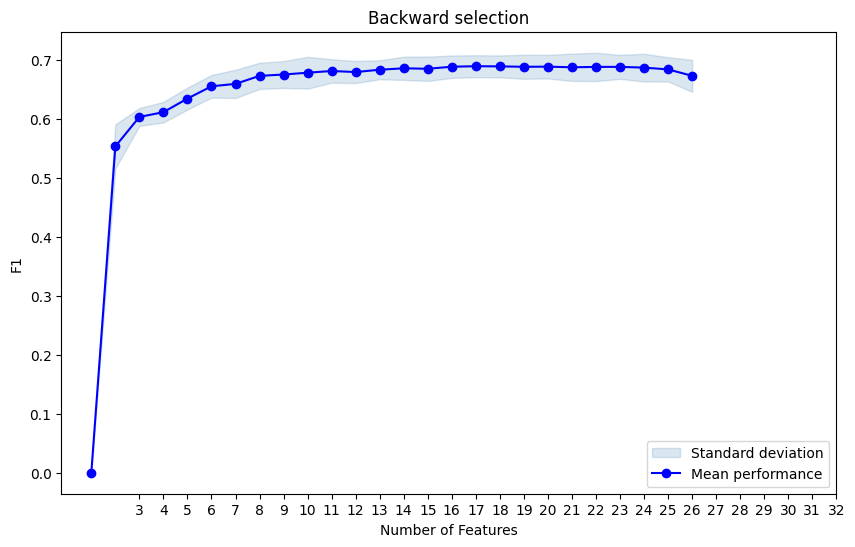

In [31]:
# Visualizing the cross validation scores for each number of features
plot_sfs(sfs2.get_metric_dict(), ylabel="F1", figsize=(10,6))
plt.title("Backward selection")
plt.legend(["Standard deviation", "Mean performance"])

In [32]:
# Names of the selected features
sfs2.k_feature_names_

('Gender',
 'Age',
 'Married',
 'Number of Dependents',
 'Population',
 'Number of Referrals',
 'Tenure in Months',
 'Phone Service',
 'Multiple Lines',
 'Avg Monthly GB Download',
 'Online Security',
 'Online Backup',
 'Premium Tech Support',
 'Monthly Charge',
 'Total Refunds',
 'Contract_0',
 'Contract_1',
 'Contract_2',
 'Payment Method_0',
 'Payment Method_1',
 'Payment Method_2')

In [33]:
# Cross-validation score for the best model with backward selection
sfs2.k_score_
# BACKWARD SELECTION IS SLIGHTLY BETTER THAN THE FORWARD

0.6892442802740766

In [34]:
# Making versions of train and test sets that only have the selected features (USE BACKWARD SELECTION)
X_train_sfs = sfs2.transform(X_train)
X_test_sfs = sfs2.transform(X_test)

In [35]:
# Fitting the model to the training data
lr_sfs.fit(X_train_sfs, y_train)

C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=15000, multi_class='ovr', penalty=None,
                   random_state=1234)

In [36]:
# making predictions for the test data
y_pred_sfs = lr_sfs.predict(X_test_sfs)

# Accuracy score to evaluate model performance
accuracy_score(y_test, y_pred_sfs)

0.8410220014194464

In [37]:
# Precision score
precision_score(y_test, y_pred_sfs)

0.710926694329184

In [38]:
# Recall score
recall_score(y_test, y_pred_sfs)

0.6826029216467463

In [39]:
# F1 score
f1_score(y_test, y_pred_sfs)

0.6964769647696477

In [40]:
# Viewing the coefficients
coefficients_log_odds = lr_sfs.coef_
coefficients_log_odds

array([[-9.93984710e-02,  1.28397122e-02,  1.62842949e+00,
        -6.97741904e-01,  5.97474026e-06, -5.24530624e-01,
        -2.87033465e-02, -1.03900218e+00,  1.09854160e-01,
         4.30392110e-03, -3.88476279e-01, -1.67181052e-01,
        -4.92640624e-01,  3.19032525e-02, -1.02586302e-02,
         7.83776670e-01, -6.69179946e-01, -1.64849800e+00,
        -4.86312355e-01, -9.44331173e-01, -1.03257740e-01]])

In [41]:
# EXP to change the log odds to odds
odds_ratios = np.exp(coefficients_log_odds)
odds_ratios

array([[0.90538187, 1.0129225 , 5.09586534, 0.49770791, 1.00000597,
        0.59183309, 0.97170468, 0.35380754, 1.11611528, 1.0043132 ,
        0.67808931, 0.84604642, 0.61101081, 1.03241762, 0.98979381,
        2.18972654, 0.51212838, 0.19233858, 0.61488971, 0.38893962,
        0.90189449]])

In [42]:
# Intercept
lr_sfs.intercept_

array([-1.53390128])

Text(0.5, 1.0, 'Logistic regression (normalized)')

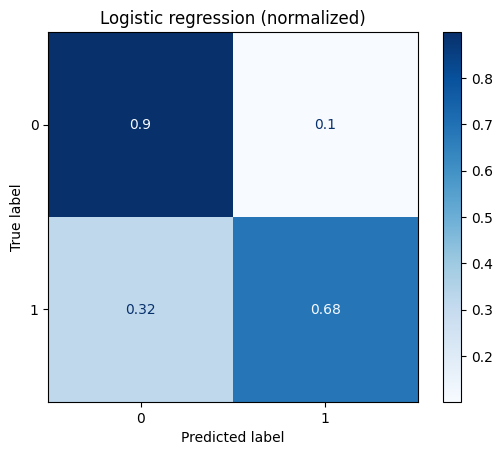

In [43]:
# Confusion matrix (normalized)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_sfs, cmap="Blues", normalize="true")
plt.title("Logistic regression (normalized)")

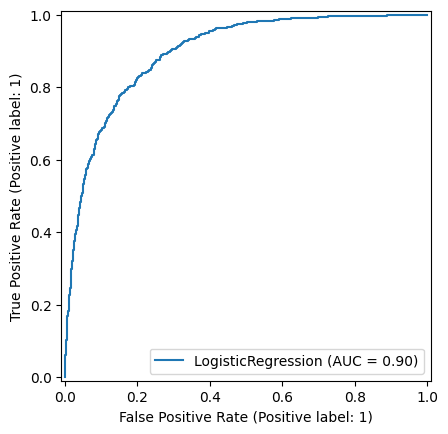

In [44]:
# ROC curve and AUC
RocCurveDisplay.from_estimator(lr_sfs, X_test_sfs, y_test)

In [45]:

feature_importance_df = pd.DataFrame({
    "Feature": sfs2.k_feature_names_,   # Use your feature names from the dataset
    "Odds ratio": 1/odds_ratios.flatten()
})

# Sorting the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by="Odds ratio", ascending=False)

# Printing the DataFrame to view feature importances
print("\nFeature Importance Table (Odds Ratios):\n")
print(feature_importance_df.to_string(index=False, formatters={'Odds ratio': '{:.2f}'.format}))
#print(feature_importance_df.to_string(index=False, formatters={'Odds ratio': '{:.2f}'.format}))


Feature Importance Table (Odds Ratios):

                Feature Odds ratio
             Contract_2       5.20
          Phone Service       2.83
       Payment Method_1       2.57
   Number of Dependents       2.01
             Contract_1       1.95
    Number of Referrals       1.69
   Premium Tech Support       1.64
       Payment Method_0       1.63
        Online Security       1.47
          Online Backup       1.18
       Payment Method_2       1.11
                 Gender       1.10
       Tenure in Months       1.03
          Total Refunds       1.01
             Population       1.00
Avg Monthly GB Download       1.00
                    Age       0.99
         Monthly Charge       0.97
         Multiple Lines       0.90
             Contract_0       0.46
                Married       0.20
